In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

# Creating DIR to store our dataset

In [ ]:
# Training_DIR=r'F:\dataset_aiml\train'
# Testing_DIR=r'F:\dataset_aiml\test'
# os.makedirs(Training_DIR)
# os.makedirs(Testing_DIR)

In [ ]:
for i in range(36):
    os.makedirs(Training_DIR+'/'+'{}'.format(i))
    os.makedirs(Testing_DIR+'/'+'{}'.format(i))

# Separating data in their respective class formats / Script

In [ ]:
directory=r"E:\Img"
os.listdir(directory)
count=0
class1=0
for images in os.listdir(directory):
    image_path=directory+'/'+images
    image=cv2.imread(image_path)
    count+=1
    if count<=50:
        path=Training_DIR+'/'+'{}'.format(class1)+'/'+'{}'.format(images)
        cv2.imwrite(path,image)
    elif count<=55 and count>50:
        path=Testing_DIR+'/'+'{}'.format(class1)+'/'+'{}'.format(images)
        cv2.imwrite(path,image)
        if count==55:
            count=0
            class1+=1


# Data Augmentation or we can say image preprocessing

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,InputLayer
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_data_generator=ImageDataGenerator(rescale=1/255,
                                       rotation_range=10,
                                        shear_range=0.2,
                                       zoom_range=0.2,
                                        width_shift_range=0.2)
test_data_generator=ImageDataGenerator(rescale=1/255)

In [4]:
train_set=train_data_generator.flow_from_directory(r"F:\dataset_aiml\train",target_size=(64,64),batch_size=32,class_mode='categorical')

Found 1800 images belonging to 36 classes.


In [5]:
test_set=train_data_generator.flow_from_directory(r"F:\dataset_aiml\test",target_size=(64,64),batch_size=32,class_mode='categorical',shuffle=False)

Found 180 images belonging to 36 classes.


In [6]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',strides=1,activation='relu',input_shape=[64,64,3]))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',strides=1,activation='relu'))                                                                                
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',strides=1,activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',strides=1,activation='relu'))                                                       
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',strides=1,activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),padding='same',strides=1,activation='relu'))                                                                                          
model.add(MaxPool2D(pool_size=(2,2),strides=2))
model.add(Flatten()) 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

In [8]:
model.add(Dense(units=4096,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=1024,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=36,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
early_stop=EarlyStopping(monitor='val_loss',patience=3)

In [11]:
model.fit(x=train_set,epochs=20,validation_data=train_set,callbacks=[early_stop],batch_size=8)

Epoch 1/20



KeyboardInterrupt



# creating a mapping of classes to thier respective names

In [12]:
new_dict = dict([(value, key) for key, value in test_set.class_indices.items()])
list1=[new_dict[i] for i in new_dict]
df=pd.DataFrame(list1,columns=['Classes_as_saved_in_folder'])
df.index.name='index_order_of_class'
df
df['Name_to_predict']=df['Classes_as_saved_in_folder'].map({
    '0': 'zero',
    '1': 'one',
    '2': 'two',
    '3': 'three',
    '4': 'four',
    '5': 'five',
    '6': 'six',
    '7': 'seven',
    '8': 'eight',
    '9': 'nine',
    '10': 'A',
    '11': 'B',
    '12': 'C',
    '13': 'D',
    '14': 'E',
    '15': 'F',
    '16': 'G',
    '17': 'H',
    '18': 'I',
    '19': 'J',
    '20': 'K',
    '21': 'L',
    '22': 'M',
    '23': 'N',
    '24': 'O',
    '25': 'P',
    '26': 'Q',
    '27': 'R',
    '28': 'S',
    '29': 'T',
    '30': 'U',
    '31': 'V',
    '32': 'W',
    '33': 'X',
    '34': 'Y',
    '35': 'Z'
}
)
df

,Classes_as_saved_in_folder,Name_to_predict
index_order_of_class,,
0,0,zero
1,1,one
2,10,A
3,11,B
4,12,C
5,13,D
6,14,E
7,15,F
8,16,G


# creating a function to predict the inputed image

In [15]:
def check_image_class(path):
    test_image=tf.keras.utils.load_img(path,
                         target_size=(64,64))
    print('The Test Image is:')
    plt.imshow(test_image)
    test_image=tf.keras.utils.img_to_array(test_image)
    test_image =np.expand_dims(test_image,axis=0)
    result=model.predict(test_image)
    result=np.argmax(result,axis=1)
    return (df['Name_to_predict'][result[0]])

# Prediction some images

The Test Image is:
1/1 [==============================] - 0s 460ms/step


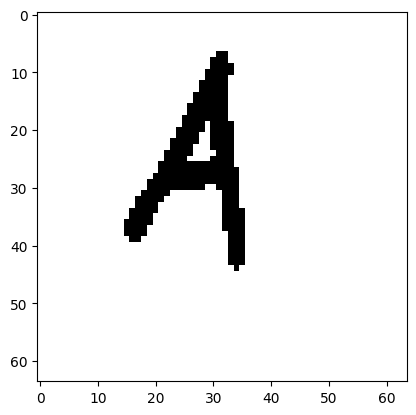

In [16]:
predicted_value=check_image_class(r"F:\dataset_aiml\test\10\img011-052.png")

In [12]:
print('The model predicted it as  :',predicted_value)

The model predicted it as  : A


The Test Image is:
1/1 [==============================] - 0s 16ms/step


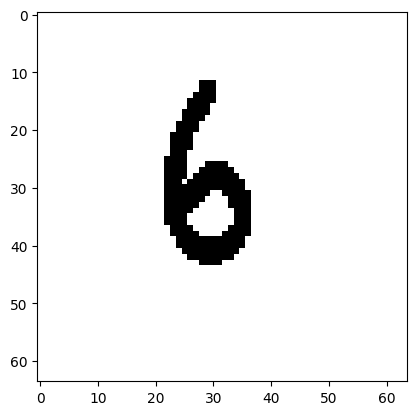

In [13]:
predicted_value=check_image_class(r"F:\dataset_aiml\test\6\img007-052.png")

In [14]:
print('The model predicted it as  :',predicted_value)

The model predicted it as  : six


# Performance Evaluation

In [ ]:
prediction=model.predict(test_set)
y=test_set.classes
prediction=np.argmax(prediction,axis=1)

In [ ]:
prediction

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
cf=confusion_matrix(y,prediction)
print(cf)

In [ ]:
print(classification_report(y,prediction,zero_division=0))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cf,
                             display_labels=range(0,36))

In [ ]:
plt.figure(figsize=(100,8),dpi=200)
disp.plot()


# Saving Model

In [ ]:

from keras.models import load_model
model.save(r'F:\Model_AIMl\a_zmodel.h5')

In [14]:
from keras.models import load_model
model=load_model(r"F:\Model_AIMl\a_zmodel.h5")

# Using Classic Netwok VGG16 and using Transfer Learning

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input

In [ ]:
base_model=VGG16(include_top=False,weights='imagenet',input_shape=(64,64,3))

In [ ]:
base_model.summary()

In [ ]:
for layer in base_model.layers[:]:
    layer.trainable = False

In [ ]:
model_ = Sequential()
model_.add(base_model)  # VGG16 base model
model_.add(Flatten())
model_.add(Dense(1024, activation='relu'))
model_.add(Dropout(0.5))
model_.add(Dense(36, activation='softmax'))
model_.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_.summary()

In [ ]:
model_.fit(train_set, epochs=20, batch_size=5,
          validation_data=test_set,callbacks=[early_stop])

In [ ]:
prediction1=model.predict(test_set)
prediction1=np.argmax(prediction1,axis=1)

In [ ]:
print(classification_report(y,prediction1,zero_division=0))

# Predicting   in real Time/GUI

In [17]:
drawing=False
def draw_circle(event,x,y,flags,param):
    global drawing
    if event==cv2.EVENT_LBUTTONDOWN:
        drawing=True
        cv2.circle(img,(x,y),8,(0,0,0),-1)
    elif event==cv2.EVENT_MOUSEMOVE:
        if drawing==True:
            cv2.circle(img,(x,y),8,(0,0,0),-1)
    elif event==cv2.EVENT_LBUTTONUP:
        drawing=False        
cv2.namedWindow(winname='my_drawing')
cv2.setMouseCallback('my_drawing',draw_circle)
img=np.full((512, 512, 3),
                        255, dtype = np.uint8)
while True: 
    cv2.imshow('my_drawing',img)
    if cv2.waitKey(20) & 0xFF==27:
        cv2.imwrite('my_test_live.jpg',img)
        break
cv2.destroyAllWindows()

The Test Image is:
1/1 [==============================] - 0s 40ms/step


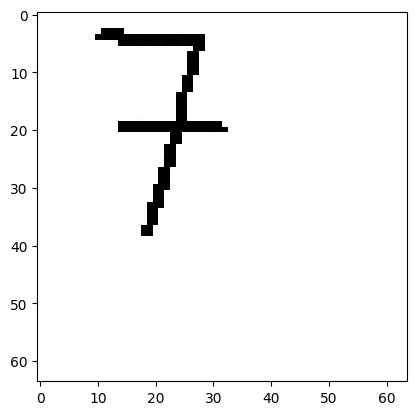

In [18]:
prediction=check_image_class('my_test_live.jpg')

In [19]:
print('The prediction is:',prediction)

The prediction is: P
